<a href="https://colab.research.google.com/github/nauvalihza/data-mining/blob/main/tugas3buatsendiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

Dataset merupakan data Pima Indian Diabet dari Kaggle

In [ ]:
#Mengimport data
datmin = pd.read_csv('newdiabet.csv',sep=";")
datmin.head(14)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,2.0,23.0,14.0,12.0,42.0,45.0,54.0,41.0,43.0
1,2,3.0,45.0,23.0,32.0,12.0,67.0,12.0,32.0,23.0
2,3,NaN,43.0,54.0,51.0,NaN,45.0,NaN,53.0,43.0
3,4,1.0,55.0,34.0,42.0,34.0,NaN,43.0,34.0,NaN
4,5,2.0,78.0,NaN,123.0,55.0,31.0,34.0,NaN,43.0
5,6,4.0,12.0,67.0,42.0,21.0,43.0,45.0,43.0,43.0
6,7,2.0,67.0,43.0,45.0,45.0,11.0,45.0,56.0,43.0
7,8,NaN,NaN,41.0,NaN,23.0,34.0,45.0,75.0,12.0
8,9,7.0,13.0,56.0,23.0,12.0,56.0,56.0,32.0,43.0
9,10,8.0,55.0,78.0,53.0,34.0,35.0,86.0,46.0,54.0


#EDA

In [ ]:
datmin.dtypes

Unnamed: 0                    int64
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

In [ ]:
datmin.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19.0,10.000000,5.627314,1.0,5.50,10.0,14.50,19.0
Pregnancies,17.0,3.588235,2.181136,1.0,2.00,3.0,5.00,8.0
Glucose,16.0,41.375000,22.252715,12.0,20.50,44.0,57.50,78.0
BloodPressure,18.0,36.222222,22.595043,4.0,16.25,34.0,53.25,78.0
SkinThickness,18.0,42.277778,26.596783,12.0,25.25,42.0,55.25,123.0
Insulin,17.0,34.588235,15.945449,12.0,23.00,34.0,45.00,67.0
BMI,18.0,40.722222,17.190304,11.0,32.50,43.0,51.00,67.0
DiabetesPedigreeFunction,18.0,45.888889,20.387103,11.0,33.25,45.0,55.75,86.0
Age,18.0,47.500000,17.830080,14.0,35.75,44.5,55.25,79.0
Outcome,18.0,41.500000,18.715360,12.0,25.25,43.0,54.00,68.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


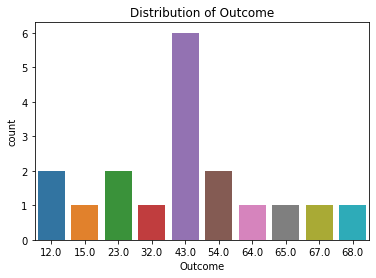

In [ ]:
sns.countplot(datmin['Outcome']).set_title('Distribution of Outcome')
plt.show()

# Skewness

In [ ]:
datatr=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
datmin[datatr].skew(axis=0, skipna=True)

Glucose         -0.031274
BloodPressure    0.231108
SkinThickness    1.520248
Insulin          0.285509
BMI             -0.190879
dtype: float64

In [ ]:
df1=datmin.loc[datmin['Outcome']==0]
df2=datmin.loc[datmin['Outcome']==1]

In [ ]:
df1[datatr].skew(axis=0, skipna=True)

NameError: ignored

In [ ]:
df2[datatr].skew(axis=0, skipna=True)

NameError: ignored

In [ ]:
df1[datatr].describe()

NameError: ignored

In [ ]:
df2[datatr].describe()

NameError: ignored

# **Preprocessing**

In [ ]:
#Mengidentifikasi nilai tak wajar sebagai missing value

datmin['Glucose']=datmin['Glucose'].replace(0,np.nan)
datmin['BloodPressure']=datmin['BloodPressure'].replace(0,np.nan)
datmin['SkinThickness']=datmin['SkinThickness'].replace(0,np.nan)
datmin['Insulin']=datmin['Insulin'].replace(0,np.nan)
datmin['BMI']=datmin['BMI'].replace(0,np.nan)
datmin.head()

KeyError: ignored

##Missing Value

In [ ]:
#cek missing value
total=datmin.isnull().sum().sort_values(ascending = False)
print(total)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome    0
dtype: int64


Sebelum melakukan imputasi pada nilai missing, dicek terlebih dahulu skewness dari data, untuk menentukan imputasi yang tepat

##Imputasi Missing Value


In [ ]:
#imputasi class mean pada attribute Glucose dan Insulin
df1['Glucose'].fillna(df1['Glucose'].mean(),inplace=True)
df2['Glucose'].fillna(df2['Glucose'].mean(),inplace=True)

NameError: ignored

In [ ]:
df1['Insulin'].fillna(df1['Insulin'].median(),inplace=True)
df2['Insulin'].fillna(df2['Insulin'].median(),inplace=True)
datmin2=df1.append(df2)
datmin2.head()

In [ ]:
#Imputasi Mean pada bloodpressure, skinthickness, dan BMI
mean1=datmin2['BloodPressure'].mean()
datmin2['BloodPressure'].fillna(mean1,inplace=True)
mean2=datmin2['SkinThickness'].mean()
datmin2['SkinThickness'].fillna(mean2,inplace=True)
mean3=datmin2['BMI'].mean()
datmin2['BMI'].fillna(mean3,inplace=True)

In [ ]:
datmin2.describe().transpose()

In [ ]:
#Ckecking Missing Value
total=datmin2.isnull().sum().sort_values(ascending = False)
print(total)

##Outlier

In [ ]:
#Cek outlier menggunakan boxplot
datat=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
ax = sns.boxplot(data=datmin2[datat], orient="h", palette="Set2")

In [ ]:
ax = sns.boxplot(data=datscale[datat], orient="h", palette="Set2")

###Univariate

In [ ]:
#membuat fungsi deteksi outlier univariat
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1-(1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['Pregnancies'])
datmin2[(datmin2['Pregnancies'] < lowerbound) | (datmin2['Pregnancies'] > upperbound)].index

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['Glucose'])
datmin2[(datmin2['Glucose'] < lowerbound) | (datmin2['Glucose'] > upperbound)].index

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['BloodPressure'])
datmin2[(datmin2['BloodPressure'] < lowerbound) | (datmin2['BloodPressure'] > upperbound)].index

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['SkinThickness'])
datmin2[(datmin2['SkinThickness'] < lowerbound) | (datmin2['SkinThickness'] > upperbound)].index

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['Insulin'])
datmin2[(datmin2['Insulin'] < lowerbound) | (datmin2['Insulin'] > upperbound)].index

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['BMI'])
datmin2[(datmin2['BMI'] < lowerbound) | (datmin2['BMI'] > upperbound)].index

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['DiabetesPedigreeFunction'])
datmin2[(datmin2['DiabetesPedigreeFunction'] < lowerbound) | (datmin2['DiabetesPedigreeFunction'] > upperbound)].index

In [ ]:
lowerbound,upperbound = outlier_treatment(datmin2['Age'])
datmin2[(datmin2['Age'] < lowerbound) | (datmin2['Age'] > upperbound)].index

## Multivariate (Mahalanobis Distance)

In [ ]:
#mengambil data tanpa kolom target/outcome
datout2=datmin2[['Pregnancies','Glucose','BloodPressure',
                'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [ ]:
#mengetahui banyak data (n)
df=len(list(datout2.columns.values))

In [ ]:
#membuat fungsi mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [ ]:
datout2['mahala'] = mahalanobis(x=datout2, data=datout2)
datout2.head()

In [ ]:
#membuat fungsi deteksi outlier MD
from scipy.stats import chi2
def MD_detectOutliers(MD,df):
    nilaichi=chi2.isf(0.01, df)
    outliers = []
    for i in range(len(MD)):
        if (MD[i] > nilaichi):
            outliers.append(i)  # index of the outlier
    return np.array(outliers)


In [ ]:
outliers_indices = MD_detectOutliers(datout2['mahala'],df)

print("Outliers Indices: {}\n".format(outliers_indices))

In [ ]:
len(outliers_indices)

In [ ]:
d2=datout2['mahala']
eks = range( len( d2 ))

plt.subplot(111)

plt.scatter( eks, d2 )

plt.hlines( chi2.ppf(0.99, df), 0, len(d2), label ="99% $\chi^2$ quantile", linestyles = "solid" )  

plt.legend()
plt.ylabel("recorded value")
plt.xlabel("observation")
plt.title( 'Mahalanobis detection of outliers at 99% $\chi^2$ quantiles' )

plt.show()

## Imputasi Outlier (Lanjutan)

In [ ]:
out2=datmin2
lowerbound,upperbound = outlier_treatment(datmin2['Pregnancies'])
out2.loc[(out2['Pregnancies'] < lowerbound) | (out2['Pregnancies'] > upperbound),'Pregnancies']=np.NaN

In [ ]:
lowerbound1,upperbound1 = outlier_treatment(datmin2['BloodPressure'])
out2.loc[(out2['BloodPressure'] < lowerbound1) | (out2['BloodPressure'] > upperbound1),'BloodPressure']=np.NaN
lowerbound2,upperbound2 = outlier_treatment(datmin2['SkinThickness'])
out2.loc[(out2['SkinThickness'] < lowerbound2) | (out2['SkinThickness'] > upperbound2),'SkinThickness']=np.NaN
lowerbound3,upperbound3 = outlier_treatment(datmin2['Insulin'])
out2.loc[(out2['Insulin'] < lowerbound3) | (out2['Insulin'] > upperbound3),'Insulin']=np.NaN
lowerbound4,upperbound4 = outlier_treatment(datmin2['BMI'])
out2.loc[(out2['BMI'] < lowerbound4) | (out2['BMI'] > upperbound4),'BMI']=np.NaN
lowerbound5,upperbound5 = outlier_treatment(datmin2['DiabetesPedigreeFunction'])
out2.loc[(out2['DiabetesPedigreeFunction'] < lowerbound5) | (out2['DiabetesPedigreeFunction'] > upperbound5),'DiabetesPedigreeFunction']=np.NaN
lowerbound6,upperbound6 = outlier_treatment(datmin2['Age'])
out2.loc[(out2['Age'] < lowerbound6) | (out2['Age'] > upperbound6),'Age']=np.NaN

In [ ]:
out2.skew(skipna=True)

In [ ]:
out2['Pregnancies'].fillna(out2['Pregnancies'].mean(),inplace=True)
out2['BloodPressure'].fillna(out2['BloodPressure'].mean(),inplace=True)
out2['SkinThickness'].fillna(out2['SkinThickness'].mean(),inplace=True)
out2['Insulin'].fillna(out2['Insulin'].mean(),inplace=True)
out2['BMI'].fillna(out2['BMI'].mean(),inplace=True)
out2['DiabetesPedigreeFunction'].fillna(out2['DiabetesPedigreeFunction'].mean(),inplace=True)
out2['Age'].fillna(out2['Age'].mean(),inplace=True)

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['Pregnancies'])
out2[(out2['Pregnancies'] < lowerbound) | (out2['Pregnancies'] > upperbound)].index

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['BloodPressure'])
len(out2[(out2['BloodPressure'] < lowerbound) | (out2['BloodPressure'] > upperbound)].index)

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['SkinThickness'])
out2[(out2['SkinThickness'] < lowerbound) | (out2['SkinThickness'] > upperbound)].index

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['Insulin'])
out2[(out2['Insulin'] < lowerbound) | (out2['Insulin'] > upperbound)].index

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['BMI'])
out2[(out2['BMI'] < lowerbound) | (out2['BMI'] > upperbound)].index

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['DiabetesPedigreeFunction'])
out2[(out2['DiabetesPedigreeFunction'] < lowerbound) | (out2['DiabetesPedigreeFunction'] > upperbound)].index

In [ ]:
lowerbound,upperbound = outlier_treatment(out2['Age'])
out2[(out2['Age'] < lowerbound) | (out2['Age'] > upperbound)].index

##After Imputasi Outlier

In [ ]:
import seaborn as sns
datat=['Pregnancies','Glucose','BloodPressure','SkinThickness',
        'Insulin','BMI','DiabetesPedigreeFunction','Age']
ax = sns.boxplot(data=out2[datat], orient="h", palette="Set2")

In [ ]:
out2['mahala'] = mahalanobis(x=out2, data=out2)
out2.head()
outliers_indices = MD_detectOutliers(out2['mahala'],df)

print("Outliers Indices: {}\n".format(outliers_indices))

In [ ]:
len(outliers_indices)

##Scaling

In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
datscale=NormalizeData(datmin2)

In [ ]:
datscale.describe()

##Feature Selection

In [ ]:
datscale.head()

In [ ]:
X=datscale[datat]
y=datscale[['Outcome']]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fvalue_selector = SelectKBest(f_classif, k=4)
X_kbest = fvalue_selector.fit_transform(X, y)

In [ ]:
X_kbest

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
cor = datscale.corr(method="kendall")
sns.heatmap(cor, annot=True)
plt.show()

#Split Training Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2,random_state=0)